In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv("spam_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [89]:
# renaming the col names
df.columns = ['target', 'text']
df.sample(5)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [90]:
from sklearn.preprocessing import LabelEncoder

df.iloc[:, 0] = LabelEncoder().fit_transform(np.array(df.iloc[:, 0]))
df.sample(5)

,target,text
3041,0,One day a crab was running on the sea shore..T...
5501,1,PRIVATE! Your 2003 Account Statement for 07808...
1373,0,1) Go to write msg 2) Put on Dictionary mode 3...
618,0,For my family happiness..
77,0,I like you peoples very much:) but am very shy...


In [91]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [92]:
#check for duplicate values
df.duplicated().sum()

415

In [93]:
#remove duplicate
df.drop_duplicates(keep='first', inplace=True)
df.shape

(5157, 2)

<h3 align="center">Exploratory Data Analysis</h3>

In [94]:
# count no of spams and no of hams
df['target'].value_counts()

0    4516
1     641
Name: target, dtype: int64

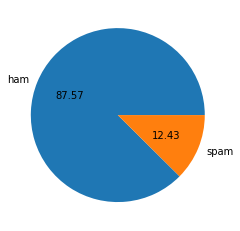

In [95]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

<h3 align="center">Text Preprocessing</h3>

In [96]:
from nltk.corpus import stopwords
# nltk.download('stopwords')
stopwords.words('english')
from string import punctuation

In [97]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [98]:
def transform_text(text):
    text = text.lower() # step1
    text = nltk.word_tokenize(text) # tokenize
    y = list()
    # removing special Characters
    for i in text:
        if(i.isalnum()):
            y.append(i)
    text = y.copy()
    y.clear()
    # removing stop words
    for i in text:
        if i not in stopwords.words('english') and i not in punctuation:
            y.append(i)
    text = y.copy()
    y.clear()
    #  stemming
    for i in text:
        y.append(ps.stem(i))
    text = y.copy()
    y.clear()
    return ' '.join(text)

In [99]:
df['transformed_text'] = df['text'].apply(transform_text)

In [100]:
# top 30 words of each category
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split(' '):
        spam_corpus.append(word)
len(spam_corpus)

9781

In [101]:
from collections import Counter
common_spam_words = Counter(spam_corpus).most_common(30)
common_spam_words = pd.DataFrame(common_spam_words)
common_spam_words.columns = ['Words', 'Frequency']
common_spam_words

,Words,Frequency
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


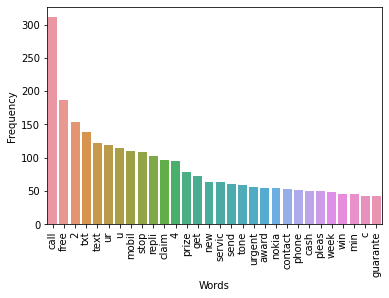

In [102]:
sns.barplot(data=common_spam_words, x='Words', y='Frequency')
# plt.xticks(rotation=45)
plt.xticks(rotation='vertical')
plt.show()

In [103]:
# top 30 words of each category
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split(' '):
        ham_corpus.append(word)
len(ham_corpus)

35948

In [104]:
from collections import Counter
common_ham_words = Counter(ham_corpus).most_common(30)
common_ham_words = pd.DataFrame(common_ham_words)
common_ham_words.columns = ['Words', 'Frequency']
common_ham_words

,Words,Frequency
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


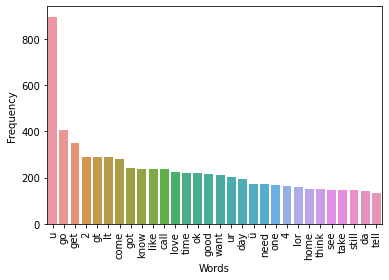

In [105]:
sns.barplot(data=common_ham_words, x='Words', y='Frequency')
# plt.xticks(rotation=45)
plt.xticks(rotation='vertical')
plt.show()

<h3 align="center">Model Building</h3>

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [107]:
x = tfidf.fit_transform(df['transformed_text']).toarray()
x.shape

(5157, 3000)

In [108]:
y = df['target'].values

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [120]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [122]:
# for tfidf
gnb.fit(x_train, y_train)
y_pred_1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred_1))
print(confusion_matrix(y_test, y_pred_1))
print(precision_score(y_test,  y_pred_1))
print(recall_score(y_test,  y_pred_1))
print(f1_score(y_test,  y_pred_1))

0.8672480620155039
[[785 120]
 [ 17 110]]
0.4782608695652174
0.8661417322834646
0.6162464985994397


In [124]:
mnb.fit(x_train, y_train)
y_pred_2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred_2))
print(confusion_matrix(y_test, y_pred_2))
print(precision_score(y_test, y_pred_2))
print(recall_score(y_test, y_pred_2))
print(f1_score(y_test, y_pred_2))

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0
0.7637795275590551
0.8660714285714286


In [125]:
bnb.fit(x_train, y_train)
y_pred_3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred_3))
print(confusion_matrix(y_test, y_pred_3))
print(precision_score(y_test, y_pred_3))
print(recall_score(y_test, y_pred_3))
print(f1_score(y_test, y_pred_3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771
0.8818897637795275
0.929460580912863


In [126]:
clf = {
    'MNB': mnb,
    'GNB': gnb,
    'BNB': bnb
}

In [127]:
def train_classifier(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [128]:
train_classifier(mnb,x_train,x_test,y_train,y_test)

(0.9709302325581395, 1.0, 0.7637795275590551, 0.8660714285714286)

In [129]:
accuracyScore = []
precisionScore = []
recallScore = []
f1Score = []
for name, clfs in clf.items():
    accuracy, precision, recall, f1 = train_classifier(clfs, x_train, x_test, y_train,y_test)
    print("For: ", name)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('f1: ', f1)
    accuracyScore.append(accuracy)
    precisionScore.append(precision)
    recallScore.append(recall)
    f1Score.append(f1)

For:  MNB
Accuracy:  0.9709302325581395
Precision:  1.0
Recall:  0.7637795275590551
f1:  0.8660714285714286
For:  GNB
Accuracy:  0.8672480620155039
Precision:  0.4782608695652174
Recall:  0.8661417322834646
f1:  0.6162464985994397
For:  BNB
Accuracy:  0.9835271317829457
Precision:  0.9824561403508771
Recall:  0.8818897637795275
f1:  0.929460580912863


In [131]:
performance_df = pd.DataFrame({'Algorithm': clf.keys(), 'accuracyScores': accuracyScore, 'precisionScores': precisionScore, 'recallScores': recallScore, 'f1Scores': f1Score})
performance_df.sort_values(by='f1Scores', ascending=False)

,Algorithm,accuracyScores,precisionScores,recallScores,f1Scores
2,BNB,0.983527,0.982456,0.881890,0.929461
0,MNB,0.970930,1.000000,0.763780,0.866071
1,GNB,0.867248,0.478261,0.866142,0.616246


In [132]:
# F1 Score for Bernoulli Naive Bayes is the highest and hence it gives better results